## PHASE 3 PROJECT

## Syriatel Customer Churn Classification Project

## 1) BUSINESS UNDERSTANDING

## Business Problem

Syriatel's major challenge is losing customers leading to revenue loss,negative brand perception and increased acquisition costs. It aims at reducing customer churn (customers leaving the network). The management would like to understand the factors that drive churn and create a model that predict it accurately hence helping Syriatel take targeted actions to retain valuable customers.
This project aims to develop a machine learning model to predict whether a customer is likely to churn based on various usage patterns, demographic data, and service-related factors.

## Business objectives

- To build a classifier to determine if a customer would ‘soon’ leave SyriaTel, 
- To Identify Customers at High Risk of Leaving Syriatel.  
- To Determine Key Churn Factors.  
- To Identify Reasons for Customer Churn.  
- To Develop a Predictive Churn Model.  
- To Evaluate and Compare Model Performance.  
- To Implement a Churn Prevention Action Plan.  
- To Design Effective Retention Strategies.  
- To Monitor and Measure Plan Effectiveness.  


## Business Questions

- Which customers/customer segments are most likely to leave Syriatel?  
- What are the primary reasons customers churn?  
- Which factors (e.g., call usage, data usage, billing issues, customer support interactions) influence churn the most?  
- How do different machine learning models compare in predicting churn?  
- What proactive strategies can be implemented to reduce churn?h   d   ocesses?  


## Success Criteria    
- The dataset should have properly preprocessed categorical and numerical features.  
- The machine learning model should achieve at least 85% accuracy to ensure reliable predictions.  
- The model should have an F1-score above 80% to balance precision and recall.  
- The ROC-AUC score should exceed 0.85, indicating strong classification performance.  
- The model should effectively identify key churn factors influencing customer retention.  
- The insights from the model should be actionable for reducing customer churn.  
d highlight


# Importing relevant libraries

In [91]:
# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score

# supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [4]:
#loading the dataset
df = pd.read_csv("Syriatel_churn.csv")
#copy of the dataset
df1 = df.copy(deep = True)

#checking the first 5 rows
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [5]:
#summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [178]:
#checking for the number of rows and columns
df.shape

(3333, 21)

In [7]:
#Statistical Summary
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [8]:
#Checking non-numerical columns
print(df.select_dtypes(include=['object']).columns)

Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


## 2.DATA PREPARATION/CLEANING

In [9]:
#checking for null values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

#### No null values found on the data set

In [10]:
#checking for duplicates 
df.duplicated().sum()

0

#### No duplicates found on the data set

In [11]:
#checking for unique values 

for dataset in df:
    print("For {},{} unique values present".format(dataset,df[dataset].nunique()))

For state,51 unique values present
For account length,212 unique values present
For area code,3 unique values present
For phone number,3333 unique values present
For international plan,2 unique values present
For voice mail plan,2 unique values present
For number vmail messages,46 unique values present
For total day minutes,1667 unique values present
For total day calls,119 unique values present
For total day charge,1667 unique values present
For total eve minutes,1611 unique values present
For total eve calls,123 unique values present
For total eve charge,1440 unique values present
For total night minutes,1591 unique values present
For total night calls,120 unique values present
For total night charge,933 unique values present
For total intl minutes,162 unique values present
For total intl calls,21 unique values present
For total intl charge,162 unique values present
For customer service calls,10 unique values present
For churn,2 unique values present


In [12]:
# cleaning up column names
df.columns = df.columns.str.replace(' ', '_')

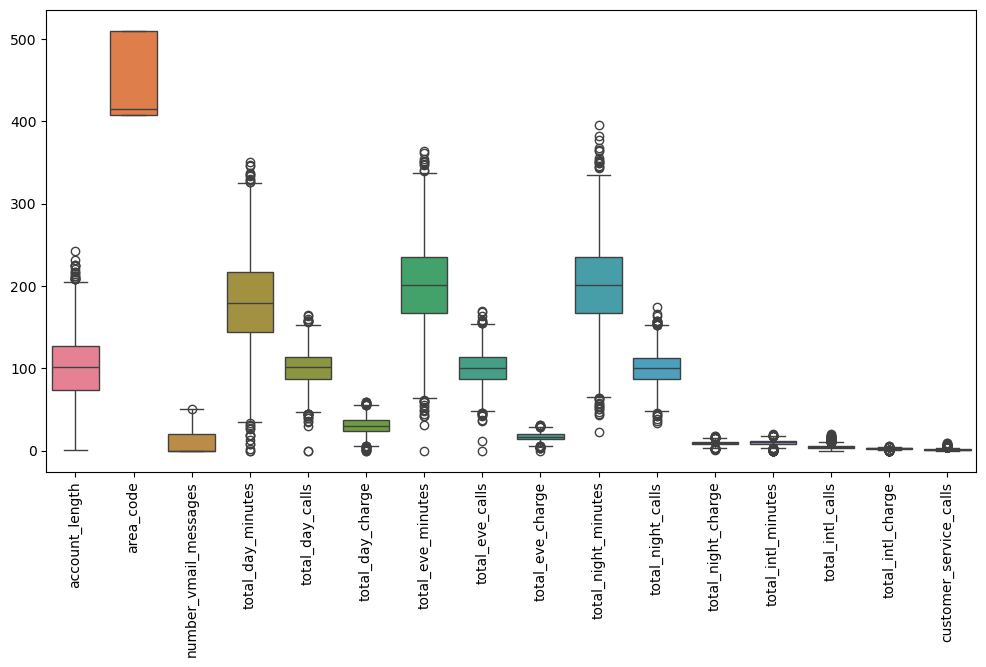

In [185]:
# Checking for outliers
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df)
plt.xticks(rotation=90)
plt.show()

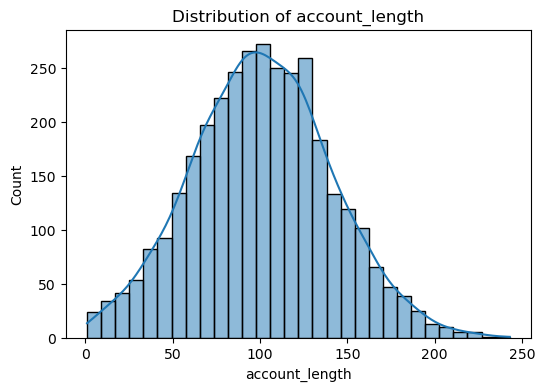

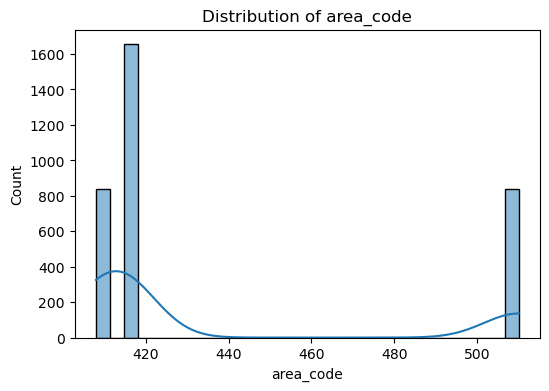

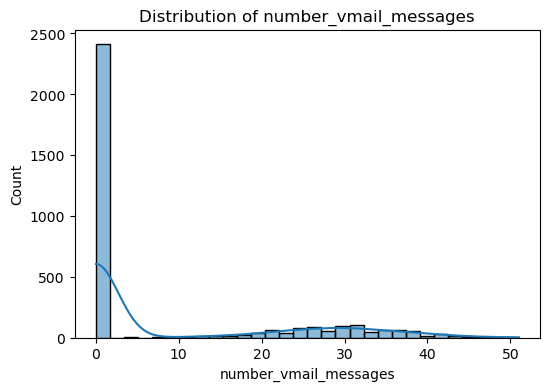

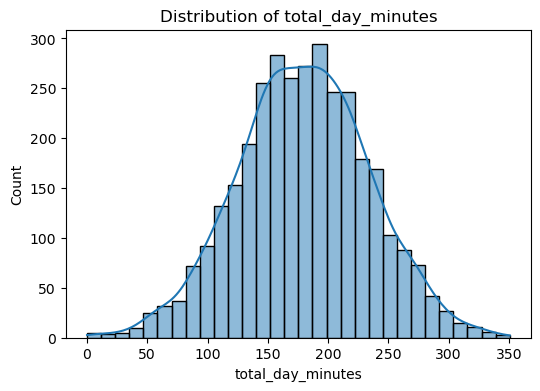

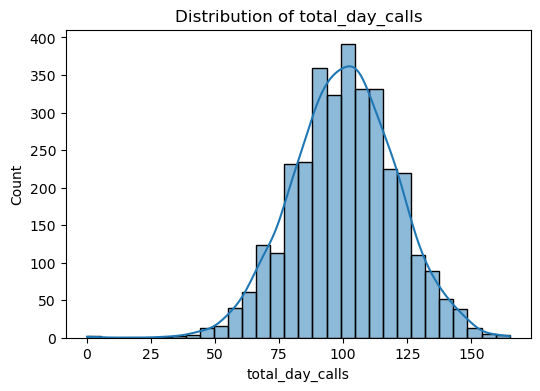

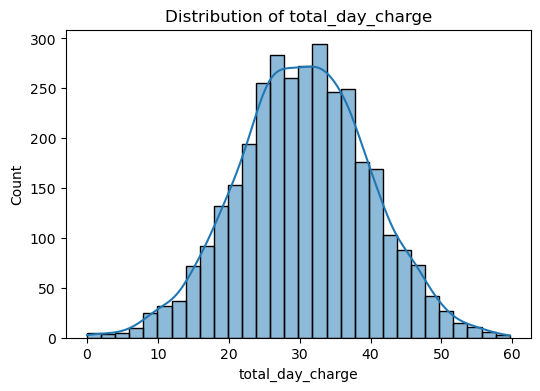

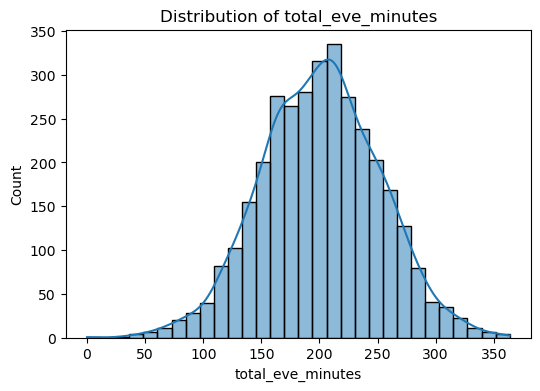

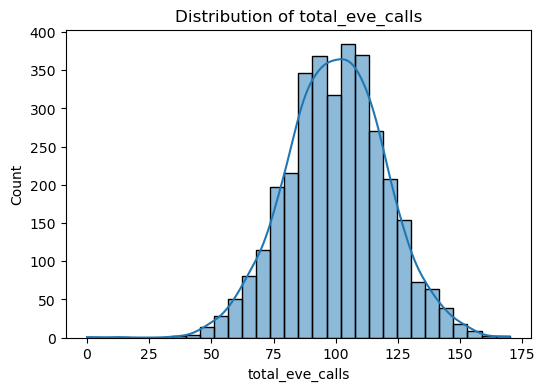

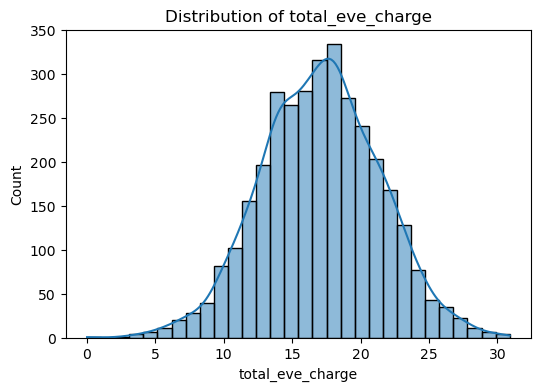

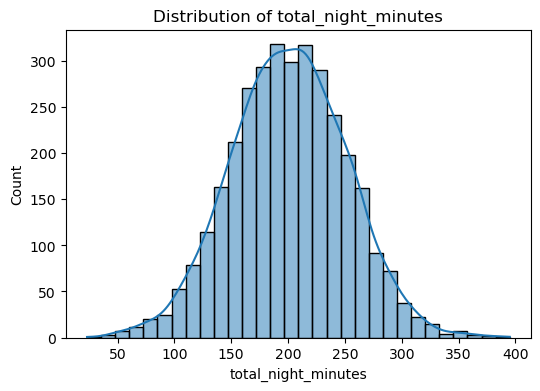

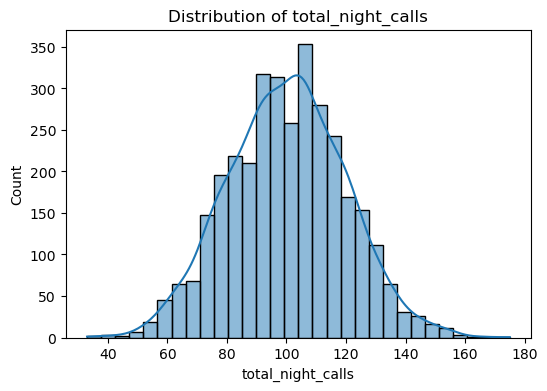

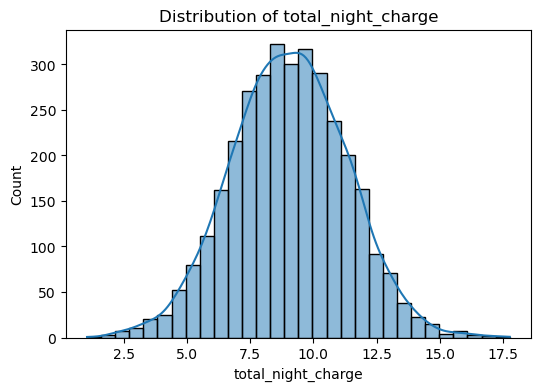

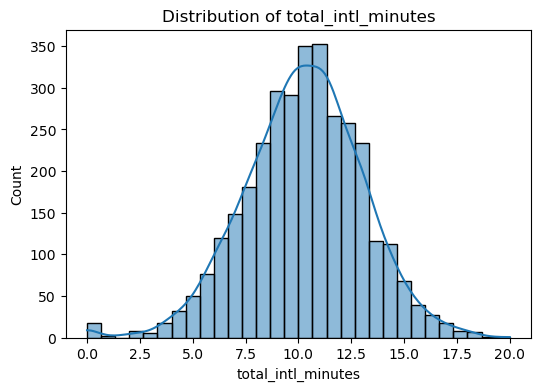

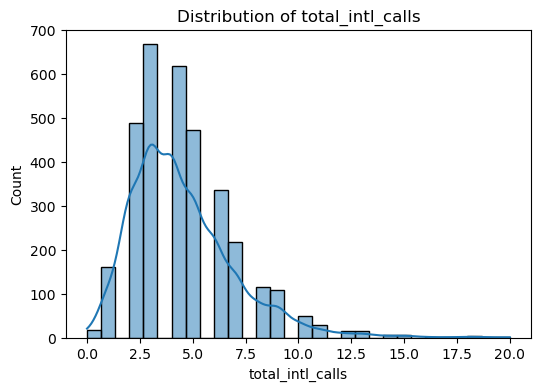

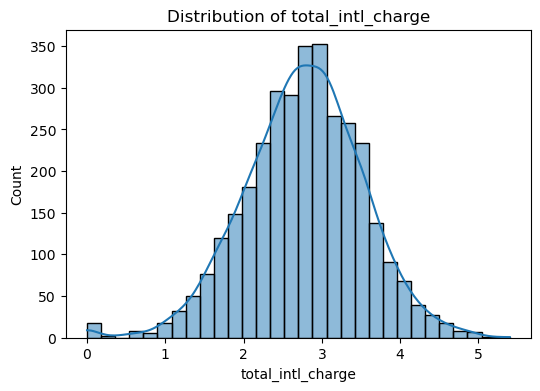

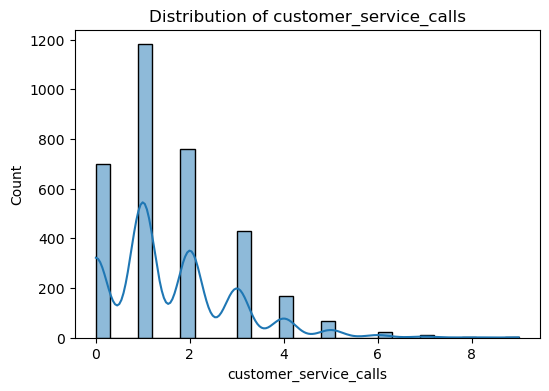

In [14]:
# Cheking if the data set has normal distribution or not
numeric_cols = df.select_dtypes(include=['number']).columns

# Histogram and KDE
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)  
    plt.title(f"Distribution of {col}")
    plt.show()

In [19]:
#Handling outliers using IQR method

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75) 
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
num_cols = df.select_dtypes(include=['number']).columns

# Remove outliers
df_clean = remove_outliers_iqr(df, num_cols)
df = df_clean.copy()
df.head()


state  account_length  area_code phone_number international_plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
4    OK              75        415     330-6626                yes   
5    AL             118        510     391-8027                yes   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
4              no                      0              166.7              113   
5              no                      0              223.4               98   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
4             28.34  ...              122             12.61   
5             37.98  ...              101             18.75   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
4                186.9                121                8.41   
5                203.9                118                9.18   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   

   customer_service_calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
4                       3  False  
5                       0  False  

[5 rows x 21 columns]

## 3.DATA ANALYSIS

## 3.1 Univariate Analysis

### Target variable churn rate

In [122]:
#Checking total count of current customers that have churned (True) and those that didn't (False)
print(df.churn.value_counts())

churn
0    2486
1     303
Name: count, dtype: int64


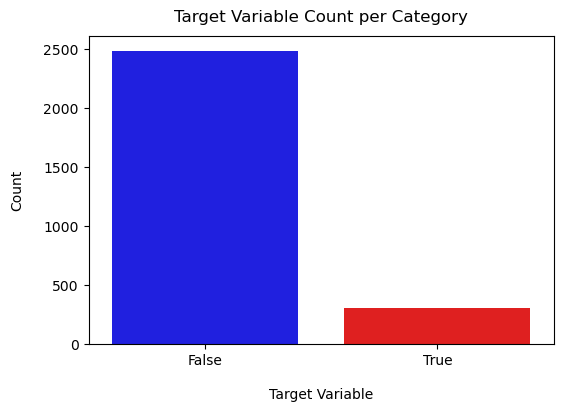

In [25]:

# Countplot using seaborn
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='churn', palette=['blue', 'red'])
plt.xlabel("Target Variable", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Target Variable Count per Category", y=1.02)
plt.show()

In [23]:
# checking the unique values of the categorical variables

print(df['churn'].unique())
print(df['international_plan'].unique())
print(df['voice_mail_plan'].unique())
print(df['customer_service_calls'].unique())
print(df['area_code'].unique())

[False  True]
['no' 'yes']
['yes' 'no']
[1 0 3 2]
[415 510 408]


In [24]:
#Checking percent of current customers that have churned (True) and those that didn't (False)
df["churn"].value_counts(normalize=True) * 100

churn
False    89.135891
True     10.864109
Name: proportion, dtype: float64

This means:

85.51% of the customers did not churn.
14.49% of the customers churned.


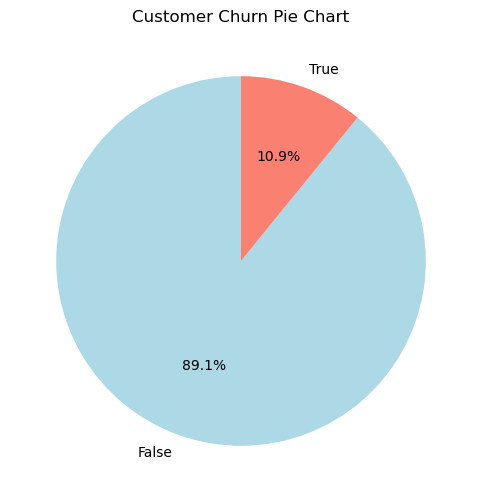

In [31]:
# Calculating churn rate(%)
churn_counts = df["churn"].value_counts()
# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', 
        colors=["lightblue", "salmon"], startangle=90)
plt.title("Customer Churn Pie Chart", fontsize=12)
plt.show()

In [32]:
def plot_categorical_distribution(data, feature):
    plt.figure(figsize=(12, 8))
    sns.countplot(x=feature, data=data, color='orange', order=data[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.title(f"Distribution of {feature}", fontsize=16)
    plt.show()

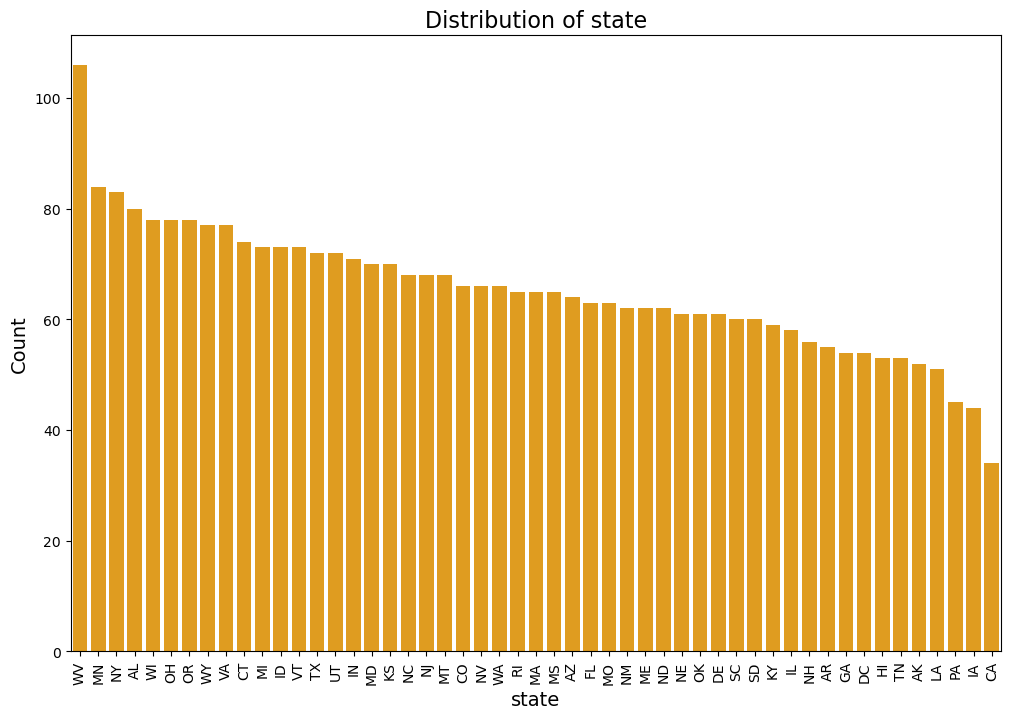

In [192]:
plot_categorical_distribution(df,feature='state')

From the visualizaton above the states with highest customers are West Virginia and Wisconsin while Carlifonia has the lowest number of customers.

## 3.2 Bivariate Analysis

Let's analyze the data by grouping it according to "State" to identify any trends or patterns, such as which states exhibit the highest churn rates.

In [33]:
states = df.groupby('state')['churn'].value_counts(normalize=True)
states = pd.DataFrame(states)
states.columns = ['percent']
states = states.reset_index()
states

state  churn   percent
0      AK  False  0.978261
1      AK   True  0.021739
2      AL  False  0.940299
3      AL   True  0.059701
4      AR  False  0.928571
..    ...    ...       ...
97     WI   True  0.058824
98     WV  False  0.944444
99     WV   True  0.055556
100    WY  False  0.877193
101    WY   True  0.122807

[102 rows x 3 columns]

The table above displays the retention rates of different states in descending order.

### Distribution of the numerical features

#### Histogram subplots  for numeric features

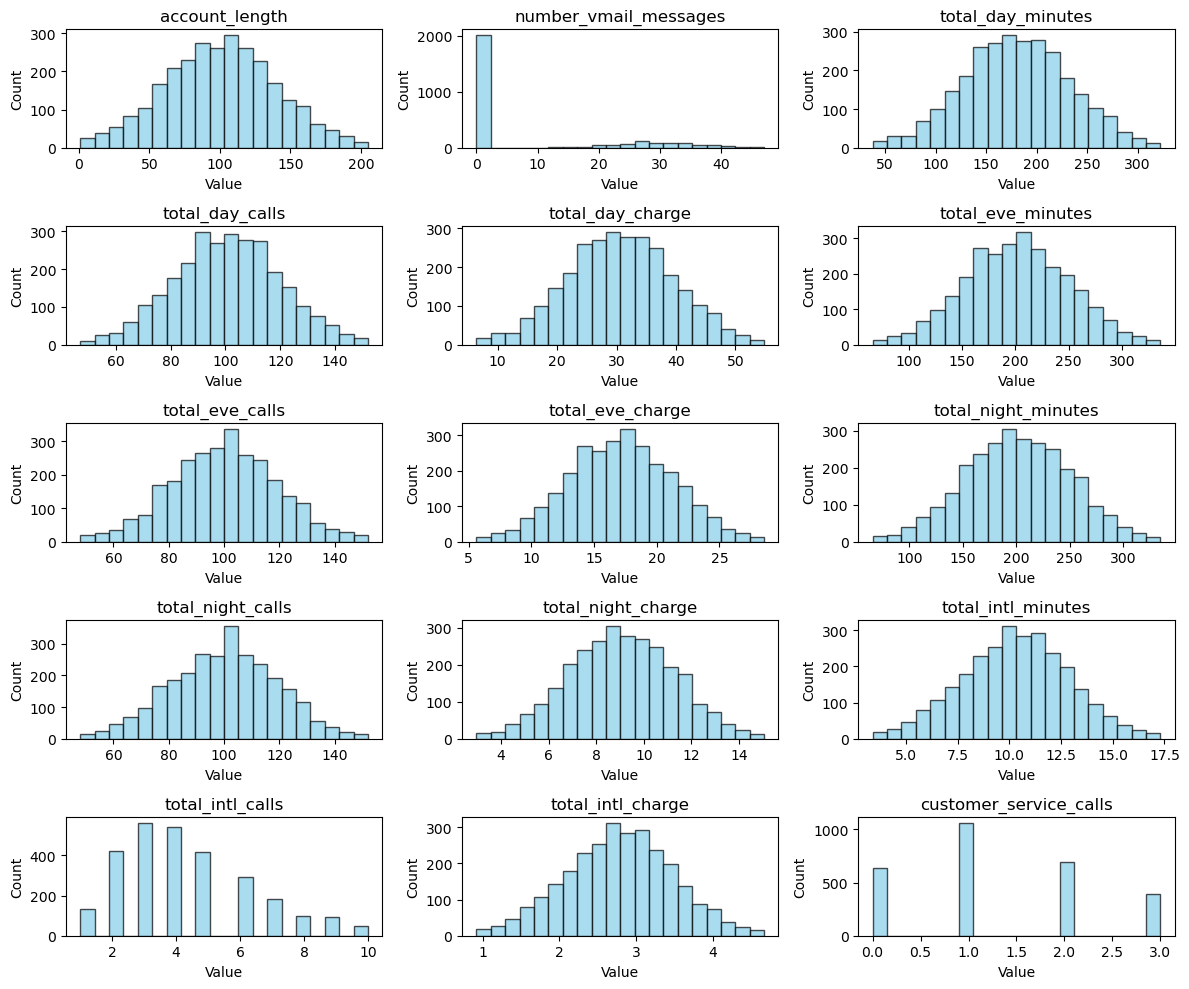

In [34]:
numeric_features = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
 'total_night_minutes', 'total_night_calls', 'total_night_charge',
 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls'
                   ]
fig, axes = plt.subplots(nrows=(len(numeric_features) - 1) // 3 + 1, ncols=3, figsize=(12, 10))

axes = axes.flatten()
# Plotting histograms
for i, feature in enumerate(numeric_features):
    axes[i].hist(df[feature], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Count')
    plt.tight_layout()
plt.show()

Account Length:
The distribution is positively skewed, indicating that most customers have shorter account lengths. This could lead to potential challenges in churn prediction, as shorter account lengths are more prevalent, but longer account lengths might serve as more significant indicators of customer retention or churn behavior.

Number of Voice Mail Messages:
The distribution is relatively even, suggesting that this feature doesn't have a strong predictive power for churn. The lack of variation in voice mail usage may limit its utility in differentiating between customers who are likely to churn versus those who are not.

Total Day Minutes, Calls, and Charge:
These features exhibit a positive skew with significant overlap between churned and retained customers. This suggests that while most customers have moderate usage during the day, there is a considerable overlap between the two groups, introducing noise in churn predictions. More advanced techniques or transformations might be necessary to better capture patterns in this data.

Total Evening Minutes, Calls, and Charge:
Similar to the Day features, the distribution is positively skewed and shows significant overlap between churned and retained customers. This further reinforces the idea that the evening usage patterns are not easily distinguishable between the two groups, adding noise that might reduce the effectiveness of these features in predicting churn.

Total Nighttime Minutes, Calls, and Charge:
The negative skew in these distributions suggests that most customers have lower activity during nighttime hours. Higher nighttime usage could serve as a more reliable predictor for churn, as customers with higher nighttime activity might be more engaged or dependent on their service, potentially indicating higher loyalty or retention.

Total International Minutes, Calls, and Charge:
These features share similar distributions to the Total Day features, with a positive skew and significant overlap between churned and non-churned customers. The overlap between classes introduces noise, which might require additional feature engineering or a more refined model to extract meaningful predictive signals.

### Boxplot of customer service calls by churn and area code

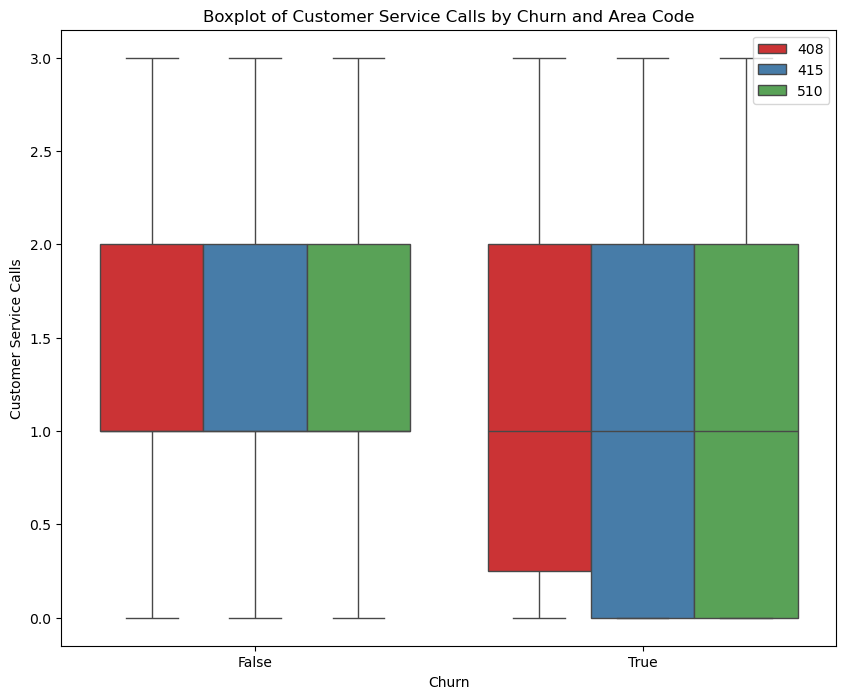

In [37]:
#Boxplot of customer service calls by churn and area code
fig, ax = plt.subplots(figsize=(10, 8))

boxplot_params = {
    'x': 'churn',
    'y': 'customer_service_calls',
    'hue': 'area_code',
    'data': df,
    'palette': 'Set1' 
}
# Plotting the boxplot
sns.boxplot(**boxplot_params, ax=ax)
plt.legend(loc='upper right')
plt.title('Boxplot of Customer Service Calls by Churn and Area Code')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()

The boxplot suggests that a significant portion of customers who terminated their contracts belong to area codes 415 and 510. Additionally, there are numerous outliers present in the dataset.

### Boxplot to compare the total day minutes of customers who stayed and those who churned.



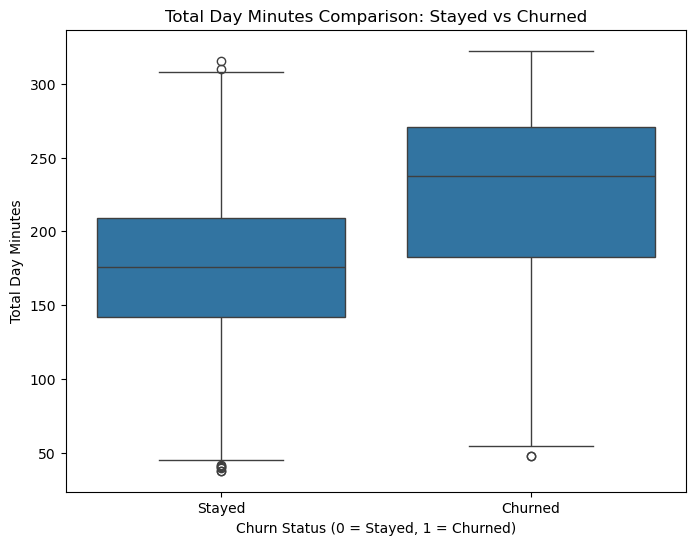

In [38]:
# Plotting the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='total_day_minutes', data=df)
plt.title('Total Day Minutes Comparison: Stayed vs Churned')
plt.xlabel('Churn Status (0 = Stayed, 1 = Churned)')
plt.ylabel('Total Day Minutes')
plt.xticks([0, 1], ['Stayed', 'Churned']) 
plt.show()

The box plot above shows that customers who spent more time on the phone during the day are more likely to churn.

### Boxplot of churn vs customer service calls

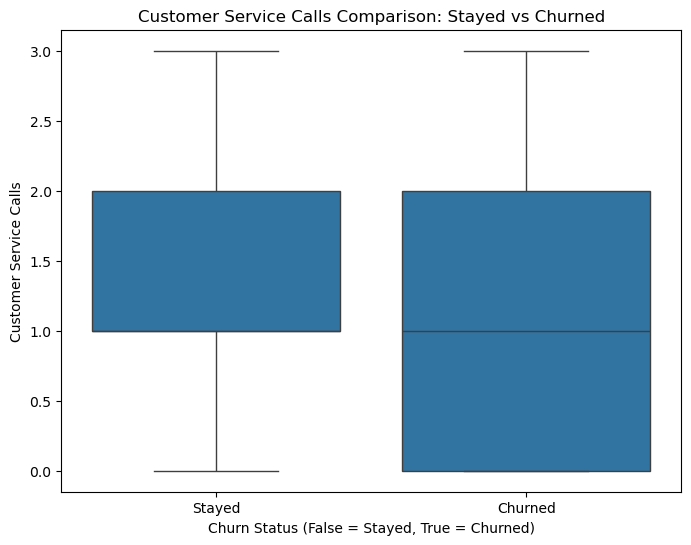

In [42]:
# Plotting the boxplot for churn vs customer service calls
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='customer_service_calls', data=df)
plt.title('Customer Service Calls Comparison: Stayed vs Churned')
plt.xlabel('Churn Status (False = Stayed, True = Churned)')
plt.ylabel('Customer Service Calls')
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.show()


### Distribution of Customer Service Calls for Churned vs Stayed

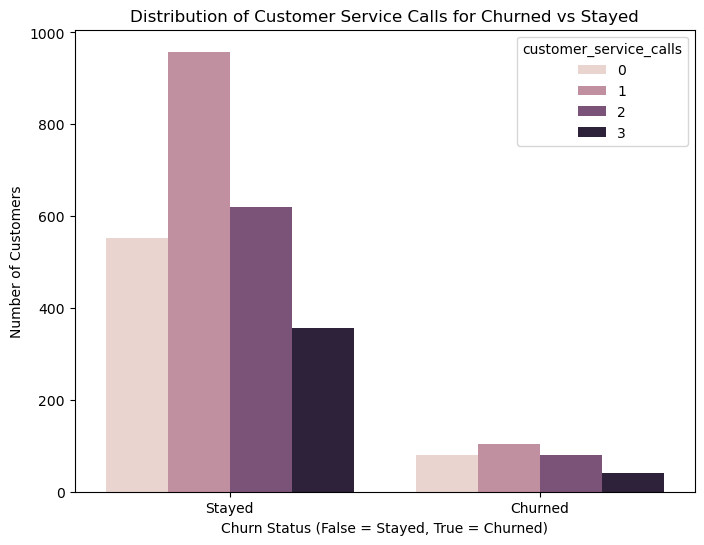

In [43]:
# Plotting the bar graph for churn vs customer service calls
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', hue='customer_service_calls', data=df)
plt.title('Distribution of Customer Service Calls for Churned vs Stayed')
plt.xlabel('Churn Status (False = Stayed, True = Churned)')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['Stayed', 'Churned']) 
plt.show()


The above bar graph shows that most churners called least times unlike those who stayed. This implies that if a customer calls even just once, it should be taken as an opportunity to make sure they are satisfied with their service

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2789 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2789 non-null   object 
 1   account_length          2789 non-null   int64  
 2   area_code               2789 non-null   int64  
 3   phone_number            2789 non-null   object 
 4   international_plan      2789 non-null   object 
 5   voice_mail_plan         2789 non-null   object 
 6   number_vmail_messages   2789 non-null   int64  
 7   total_day_minutes       2789 non-null   float64
 8   total_day_calls         2789 non-null   int64  
 9   total_day_charge        2789 non-null   float64
 10  total_eve_minutes       2789 non-null   float64
 11  total_eve_calls         2789 non-null   int64  
 12  total_eve_charge        2789 non-null   float64
 13  total_night_minutes     2789 non-null   float64
 14  total_night_calls       2789 non-null   int64

In [45]:
summary = df.groupby(['state'])['phone_number'].count()
top8 = summary.nlargest(10)
top8

state
WV    90
MN    76
WI    68
AL    67
OH    66
NY    65
CT    64
OR    63
VA    63
UT    62
Name: phone_number, dtype: int64

From the above we can see the top 10 states that had the highest number of customers

In [46]:
def plot_categorical_distribution(df, feature):
    """
    Plots the distribution of a categorical feature based on churn rate in the given data.
    """
    plt.figure(figsize=(10, 4))
    
    # Calculate churn rate for each category
    churn_rate = df.groupby(feature)["churn"].mean().sort_values(ascending=False)
    
    #  top 8 categories based on churn rate
    top_8_categories = churn_rate.head(8).index.tolist()
    
    #  countplot with churn distribution
    sns.countplot(x=feature, hue="churn", data=df, order=top_8_categories)
    
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.title(f'Distribution of {feature} based on Churn Rate')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

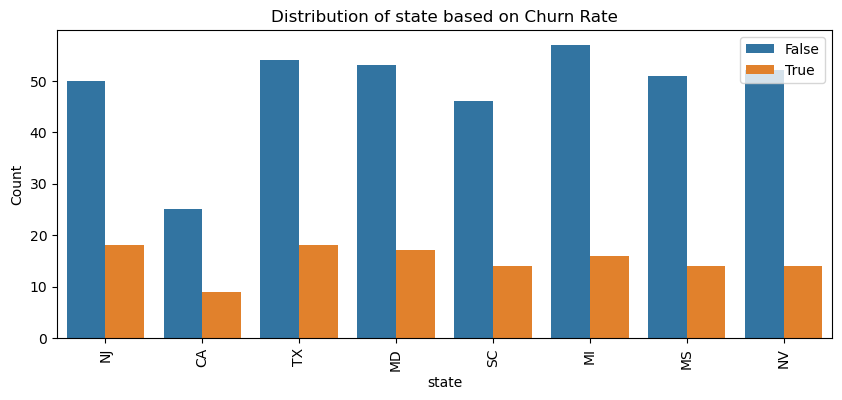

In [202]:
plot_categorical_distribution(df, 'state')

Customers that churned, majority are from Texas, New Jersey, Maryland and Miami

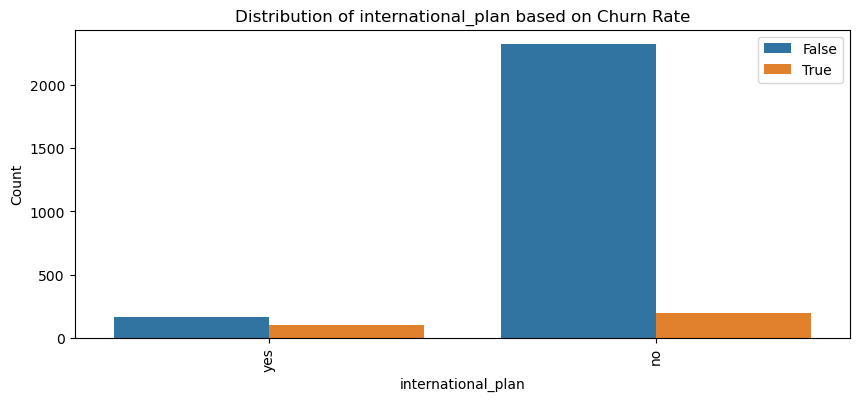

In [47]:
plot_categorical_distribution(df, 'international_plan')

The histogram ndicates that most of the customers who terminated their contracts did not have an international plan.

In [49]:
def plot_churn_kde(df, x_column, charge_type):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x=x_column, hue='churn', fill=True)
    plt.xlabel(f'Total {charge_type} Charge')
    plt.ylabel('Density')
    plt.title(f'Churn Distribution by {charge_type} Charges')
    plt.show()

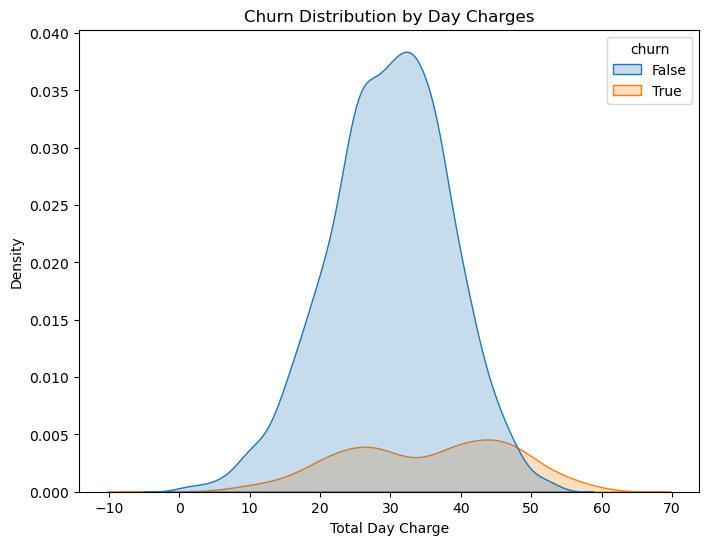

In [205]:
# Churn by day charges
plot_churn_kde(df, 'total_day_charge', 'Day')

The KDE plot representing churn based on daily charges highlights a significant pattern: customers who have ended their accounts tend to have higher total day charges compared to those who haven't churned. This suggests that customers who perceive the service as too expensive during daytime hours or are dissatisfied with it might be more likely to churn.

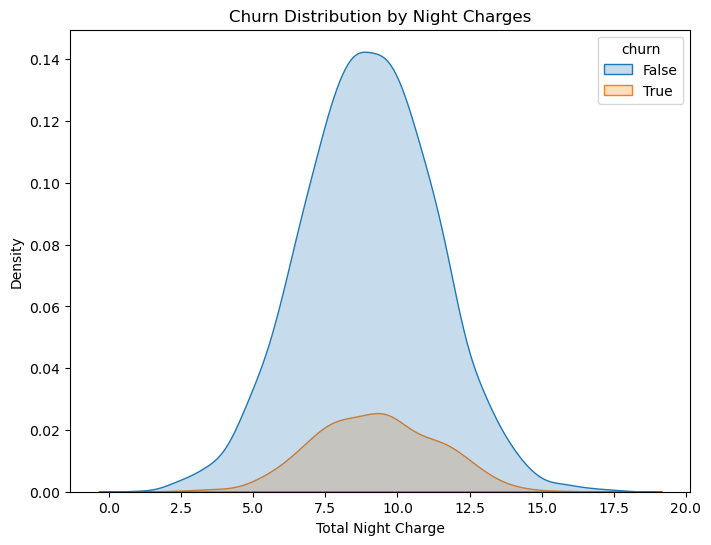

In [206]:
plot_churn_kde(df, 'total_night_charge', 'Night')

The KDE plot shows that Customers who have ended their accounts generally exhibit higher total night charges compared to customers who have not terminated their accounts.

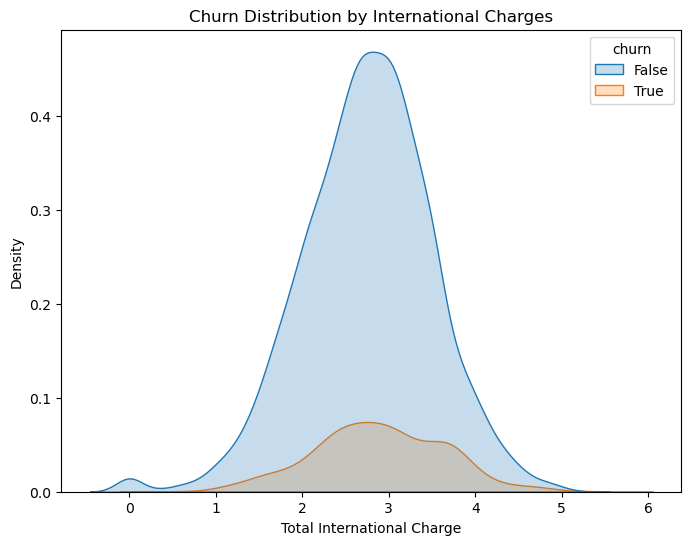

In [207]:
plot_churn_kde(df, 'total_intl_charge', 'International')

Based on the distribution, customers with higher total international charges are slightly more prone to churning.

## 3.3 Multivariate Analysis

3.3.1 Numerical Features 

In [50]:

num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols

['account_length',
 'area_code',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'customer_service_calls']

In [51]:
# numerical columns
num_cols = df.select_dtypes(include=["number"])

# create a new DataFrame from the numerical columns
num_df = pd.DataFrame(num_cols)
num_df

account_length  area_code  number_vmail_messages  total_day_minutes  \
0                128        415                     25              265.1   
1                107        415                     26              161.6   
2                137        415                      0              243.4   
4                 75        415                      0              166.7   
5                118        510                      0              223.4   
...              ...        ...                    ...                ...   
3328             192        415                     36              156.2   
3329              68        415                      0              231.1   
3330              28        510                      0              180.8   
3331             184        510                      0              213.8   
3332              74        415                     25              234.4   

      total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
0                 110             45.07              197.4               99   
1                 123             27.47              195.5              103   
2                 114             41.38              121.2              110   
4                 113             28.34              148.3              122   
5                  98             37.98              220.6              101   
...               ...               ...                ...              ...   
3328               77             26.55              215.5              126   
3329               57             39.29              153.4               55   
3330              109             30.74              288.8               58   
3331              105             36.35              159.6               84   
3332              113             39.85              265.9               82   

      total_eve_charge  total_night_minutes  total_night_calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
4                12.61                186.9                121   
5                18.75                203.9                118   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total_night_charge  total_intl_minutes  total_intl_calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
4                   8.41                10.1                 3   
5                   9.18                 6.3                 6   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total_intl_charge  customer_service_calls  
0                  2.70                       1  
1                  3.70                       1  
2                  3.29                       0  
4                  2.73                       3  
5                  1.70                       0  
...                 ...                     ...  
3328               2.67                       2  
3329               2.59                       3  
3330               3.81                       2  
3331               1.35                       

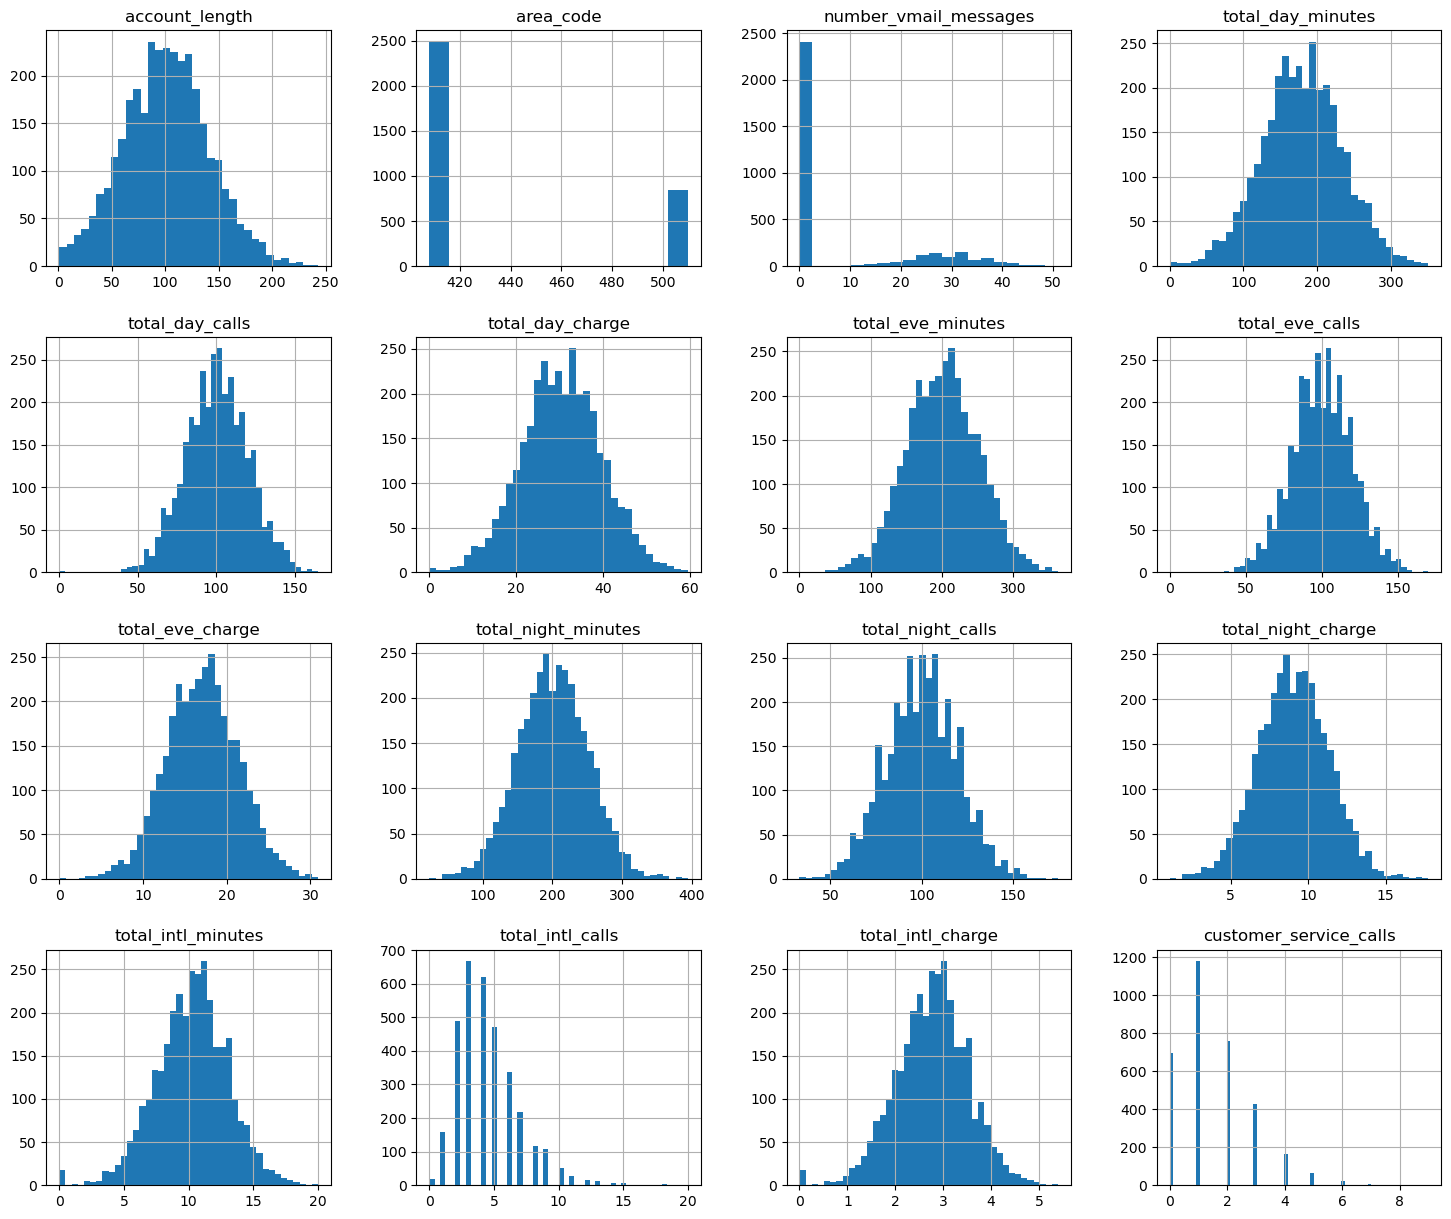

In [210]:
num_df.hist(figsize=(18,15), bins="auto");

We notice that the majority of the data follows a normal distribution, except for total international calls, customer service calls, area code, and voice message plan.

Pairplots for Numeric Features (Hue as "Churn")

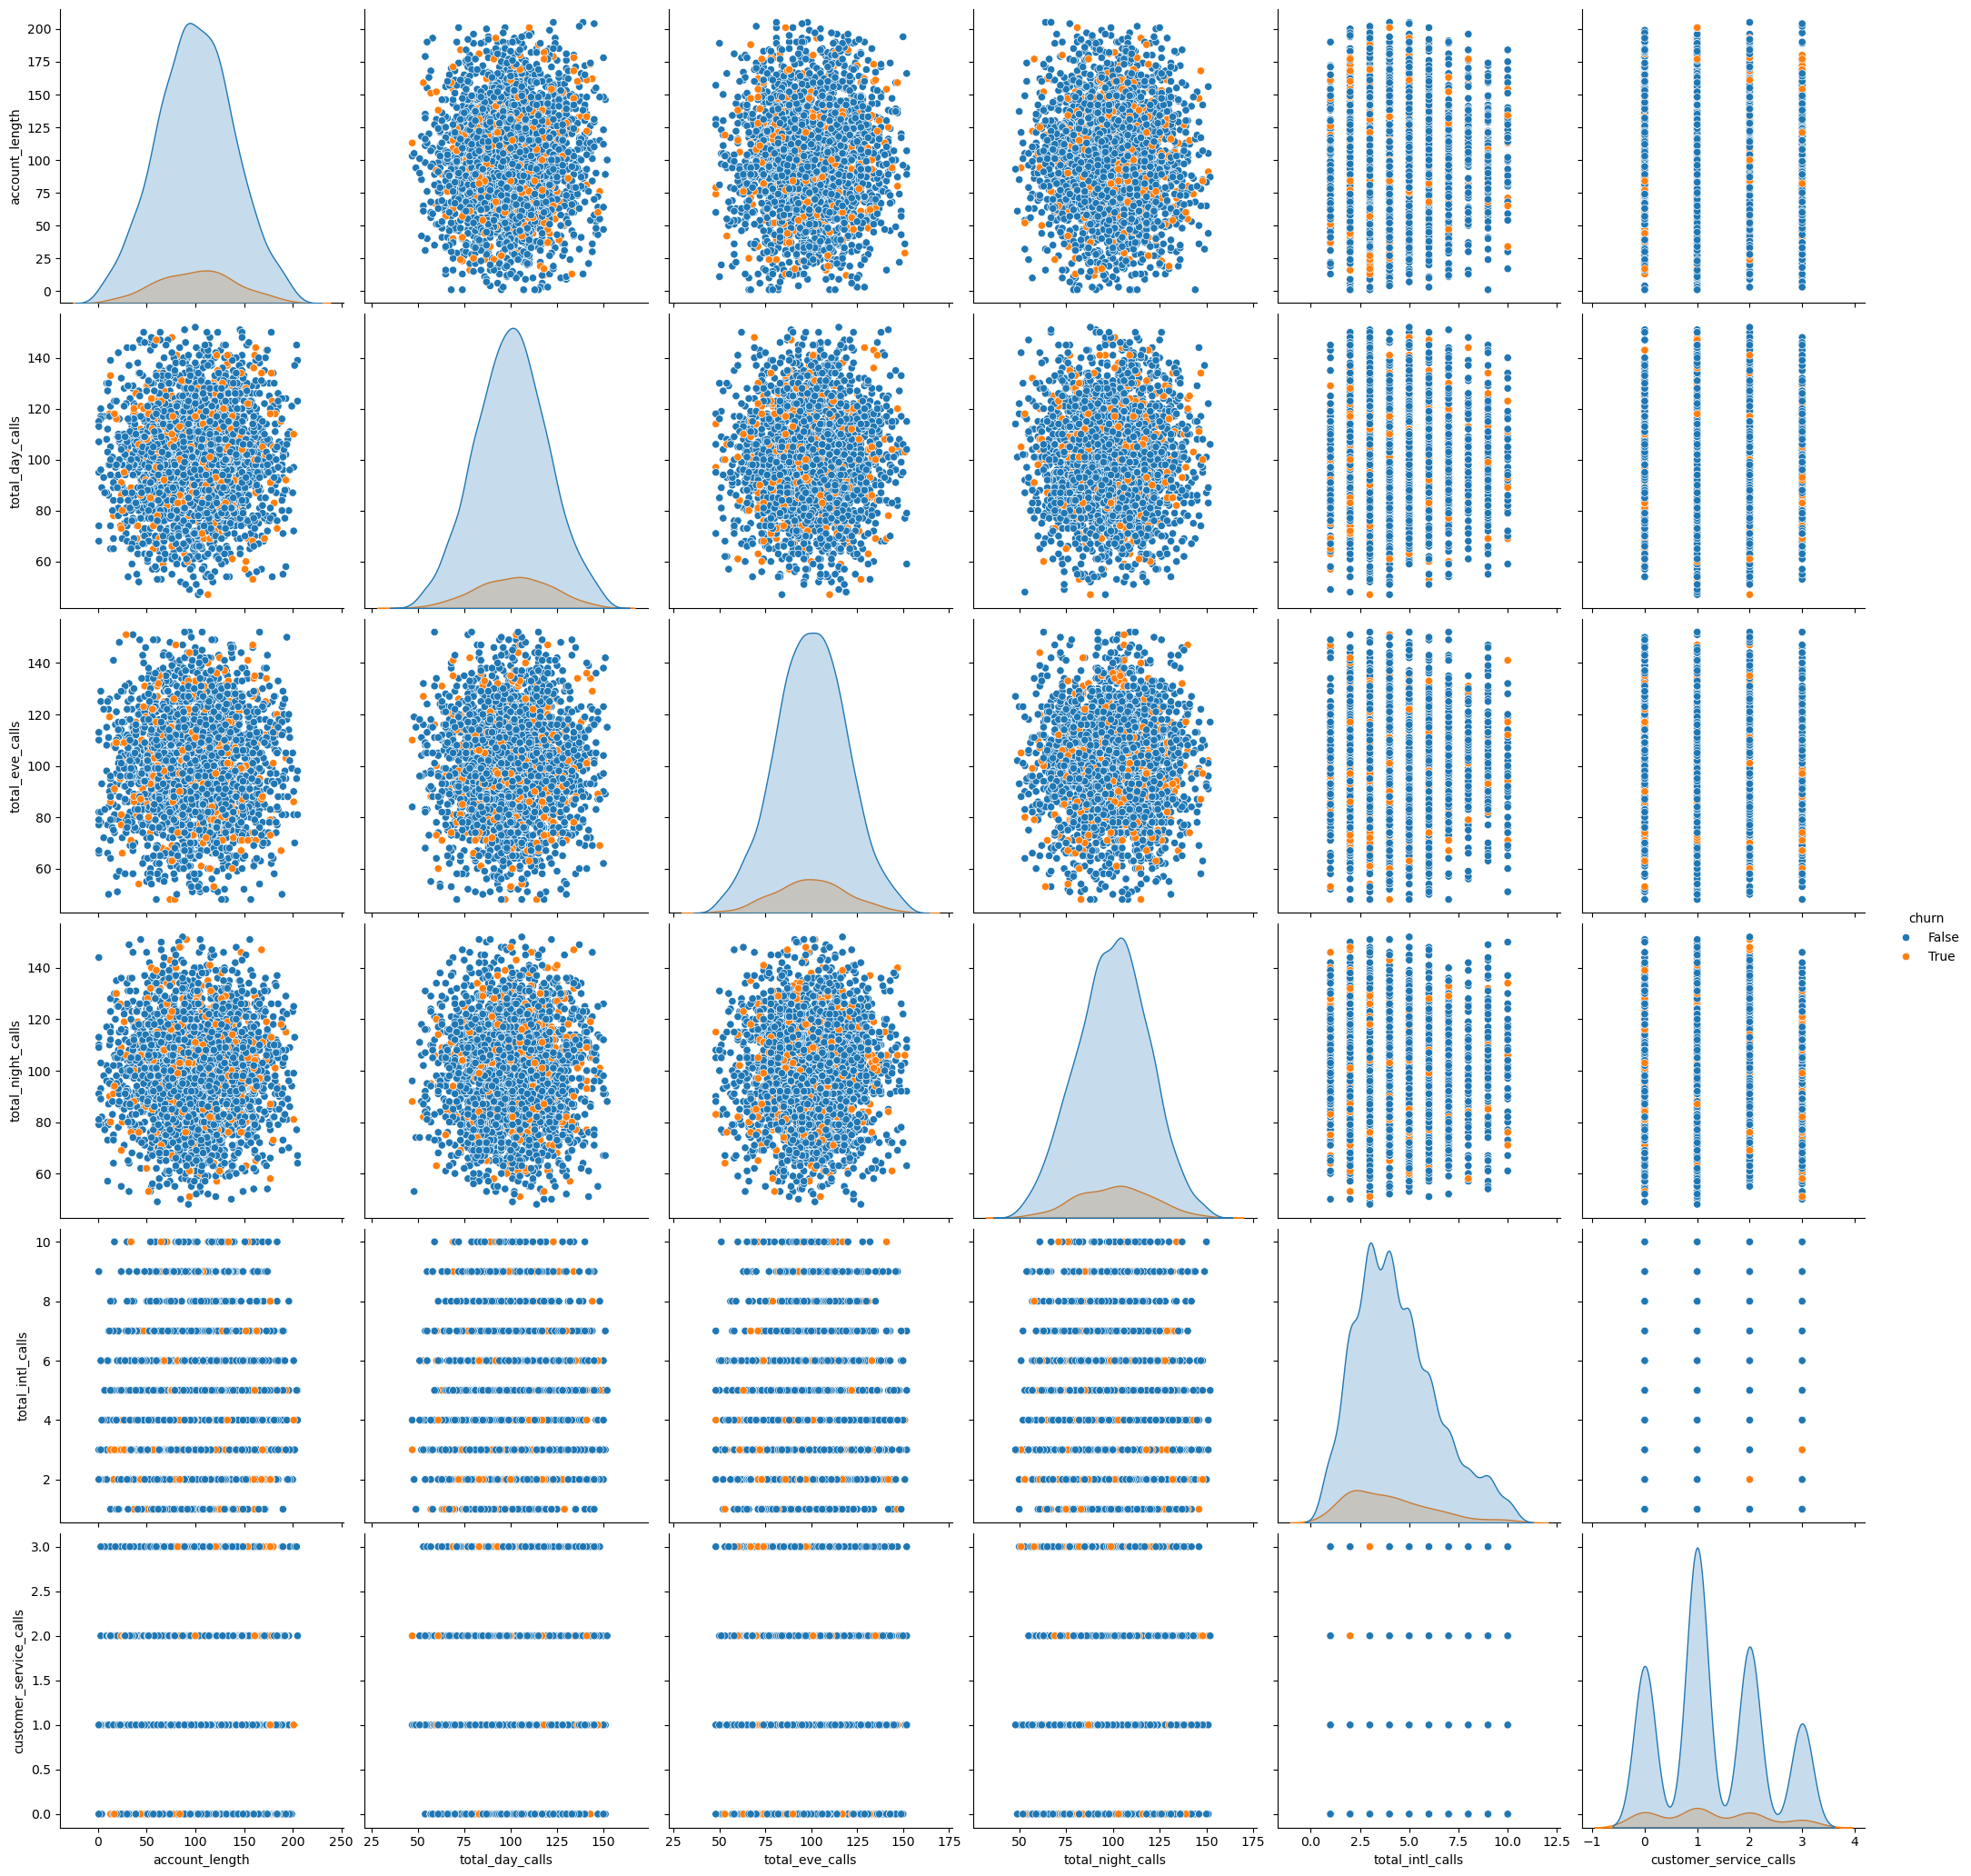

In [52]:
data_temp = df[["account_length","total_day_calls","total_eve_calls","total_night_calls",
                "total_intl_calls","customer_service_calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=3.5);
plt.show();

Customers with a low number of daytime calls exhibited a higher churn rate.

Customers with a low number of evening calls showed a higher churn rate.

Customers with a low number of international calls had a higher churn rate, despite the positively skewed nature of the data.

Customers with shorter account length had higher churn rates

 Correlation Heatmap

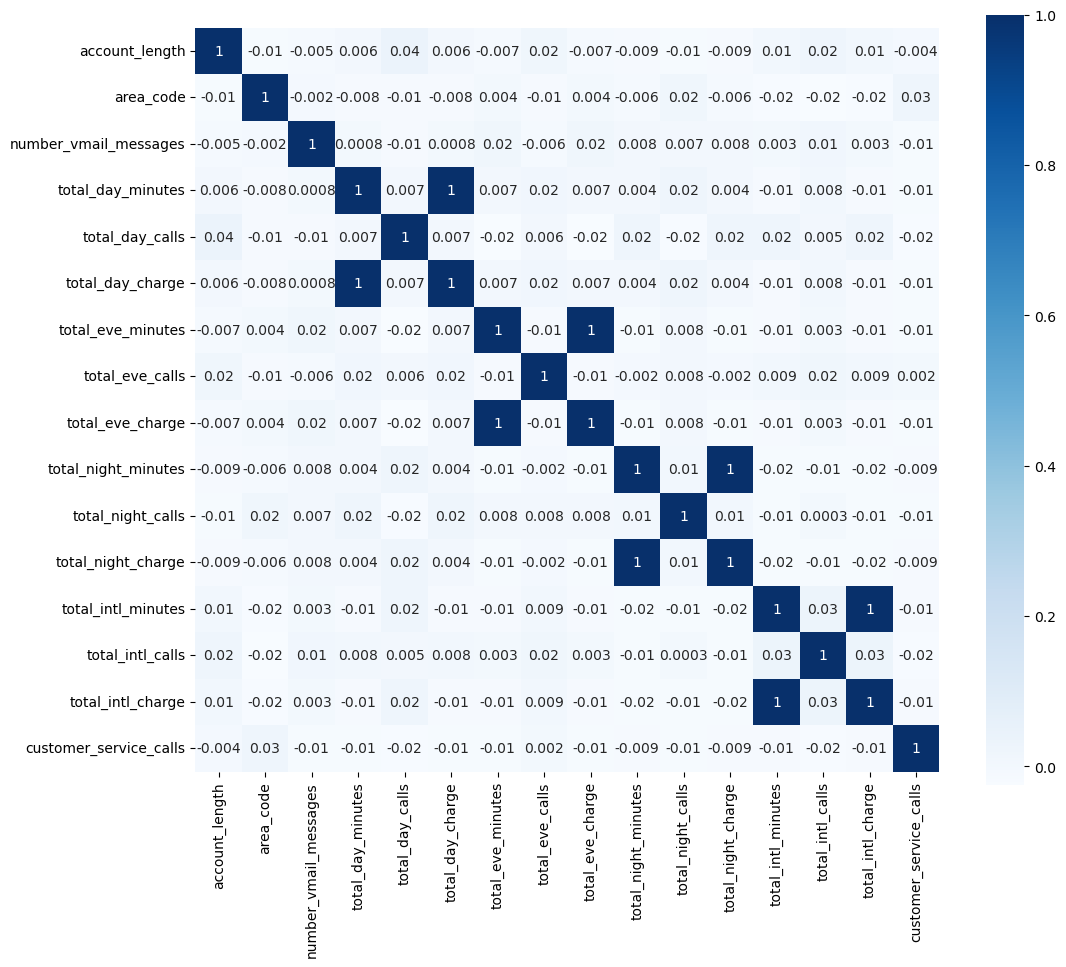

In [212]:
corr_mat = num_df.corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(12,10))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

Blue indicates high correlation. Upon observation, Blue squares along the diagonal represent the correlation of a feature with itself, which is always 1. Blue squares outside this diagonal suggest highly correlated features. In this dataset, high correlations exist between total day minutes and total day charge, total evening minutes and total evening charge, total night minutes and total night charge, as well as total international minutes and total international charge. Some of the features that are close to the 0 mean that there is no linear relationship between the features It's necessary to drop highly correlated features before modeling.

In [213]:
#Checking for Multicollinearity

df_corr = num_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

df_corr.set_index(['pairs'], inplace = True)

df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_corr.columns = ['cc']

df_corr.drop_duplicates(inplace=True)

df_corr[(df_corr.cc>.90) & (df_corr.cc<1)]

cc
pairs                                              
(total_day_minutes, total_day_charge)      1.000000
(total_eve_charge, total_eve_minutes)      1.000000
(total_night_minutes, total_night_charge)  0.999999
(total_intl_minutes, total_intl_charge)    0.999993

This shows the multicollineared features; the results is true as high total minutes = total charge. Therefore we will drop 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'.

In [214]:
#Define Categorical columns
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category' or df[col].dtype == 'bool':
        categorical_cols.append(col)
categorical_cols

['state', 'phone_number', 'international_plan', 'voice_mail_plan', 'churn']

The analysis of categorical features reveals that the "phone number" column doesn't provide meaningful information about customer churn. Therefore, we'll remove this column. Additionally, since "churn" is our target variable, we'll exclude it from the dataset.

### Encoding

In [56]:
# Converting the columns with 'yes' or 'no' to binary using LabelEncoder
label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])
df.head()

state  account_length  area_code phone_number international_plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
4    OK              75        415     330-6626                yes   
5    AL             118        510     391-8027                yes   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
4              no                      0              166.7              113   
5              no                      0              223.4               98   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
4             28.34  ...              122             12.61   
5             37.98  ...              101             18.75   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
4                186.9                121                8.41   
5                203.9                118                9.18   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
4                10.1                 3               2.73   
5                 6.3                 6               1.70   

   customer_service_calls  churn  
0                       1      0  
1                       1      0  
2                       0      0  
4                       3      0  
5                       0      0  

[5 rows x 21 columns]

In [58]:
#transform the categorical variable churn
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Applying label encoding to the 'international_plan', 'voice_mail_plan', and 'state' columns
df['international_plan'] = label_encoder.fit_transform(df['international_plan'])
df['voice_mail_plan'] = label_encoder.fit_transform(df['voice_mail_plan'])
df['state'] = label_encoder.fit_transform(df['state'])
print(df[['international_plan', 'voice_mail_plan', 'state']].head())

   international_plan  voice_mail_plan  state
0                   0                1     16
1                   0                1     35
2                   0                0     31
4                   1                0     36
5                   1                0      1


In [218]:
print(df[['churn', 'international_plan', 'voice_mail_plan', 'state']].isnull().sum())

churn                 0
international_plan    0
voice_mail_plan       0
state                 0
dtype: int64


The label encoder has now converted the categorical variables above into numerical labels

## 4.Modeling

Project Objective:
We are working on a binary classification problem to predict customer churn — whether a customer will leave or remain with a service. The goal is to develop a model that effectively predicts churn based on historical data.

Approach and Success Criteria:

Our primary approach involves using a logistic regression model as the baseline. Evaluation will be based on the recall score, with a success criterion of achieving a recall score of 75% or higher. Recall is a crucial metric in this context, as it emphasizes minimizing false negatives, which is particularly important when predicting customer churn.

Algorithms to be Employed:
Logistic Regression:
Decision Tree:
Random Forest:


4.1 Define X and y

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int32  
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   int32  
 5   voice_mail_plan         3333 non-null   int32  
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [220]:
df.head()

state  account_length  area_code phone_number  international_plan  \
0     16             128        415     382-4657                   0   
1     35             107        415     371-7191                   0   
2     31             137        415     358-1921                   0   
3     35              84        408     375-9999                   1   
4     36              75        415     330-6626                   1   

   voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0                1                     25              265.1              110   
1                1                     26              161.6              123   
2                0                      0              243.4              114   
3                0                      0              299.4               71   
4                0                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer_service_calls  churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0  

[5 rows x 21 columns]

In [222]:
X.head()

state  account_length  area_code  international_plan  voice_mail_plan  \
0     16             128        415                   0                1   
1     35             107        415                   0                1   
2     31             137        415                   0                0   
3     35              84        408                   1                0   
4     36              75        415                   1                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer_service_calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

### 4.1.1 Model 1: Logistic Regression

In [123]:
# X and Y variable
X = df.drop(columns=["churn","phone_number"]) 

#Train_Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

# Standardizing using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=123)
logreg.fit(X_train_scaled, y_train)

y_hat_train = logreg.predict(X_train_scaled)
y_hat_test = logreg.predict(X_test_scaled)

# Predicted probabilities
y_hat_train_prob = logreg.predict_proba(X_train_scaled)[:, 1]
y_hat_test_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
accuracy_train = accuracy_score(y_train, y_hat_train)
auc_train = roc_auc_score(y_train, y_hat_train_prob)
accuracy_test = accuracy_score(y_test, y_hat_test)
auc_test = roc_auc_score(y_test, y_hat_test_prob)

print(f'Train Accuracy: {round(accuracy_train, 2)}')
print(f'Train AUC: {round(auc_train, 2)}')
print(f'Test Accuracy: {round(accuracy_test, 2)}')
print(f'Test AUC: {round(auc_test, 2)}')


Train Accuracy: 0.91
Train AUC: 0.86
Test Accuracy: 0.92
Test AUC: 0.85


Good Accuracy (86% on train & test)
The model is performing consistently on both sets, which is a good sign.
There is no major overfitting, as train and test accuracies are similar.

Lower AUC Score (0.71 on test)
0.71 is good but indicates some difficulty in distinguishing between churners and non-churners.
Since AUC is lower than accuracy, the model might be biased toward the majority class (e.g., predicting "No Churn" too often).

Plotting confusion matrix

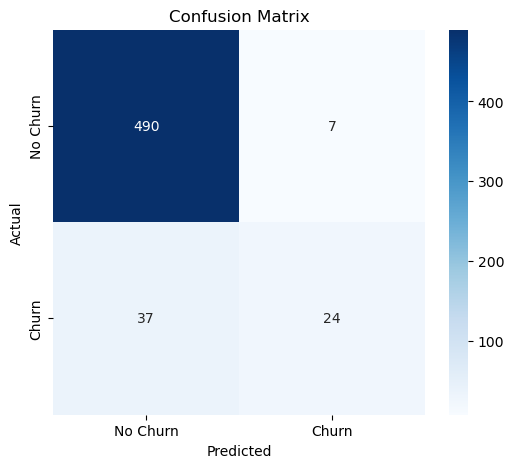

In [124]:

# Generating predictions
y_test_pred = logreg.predict(X_test_scaled)

# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Ploting using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Looking at the confusion matrix, the model gets most of the predictions right, both when it predicts something is positive and when it predicts something is negative. This suggests that the model is reliable and doesn't make too many mistakes. It's good at classifying both positive and negative cases accurately.

### 4.1.2 Model 2: Decision Tree

In [97]:
 #Initialize Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=123, max_depth=5, criterion="gini")  

# Training the model
dtree.fit(X_train_scaled, y_train)

y_train_pred = dtree.predict(X_train_scaled)
y_test_pred = dtree.predict(X_test_scaled)

y_train_prob = dtree.predict_proba(X_train_scaled)[:, 1]
y_test_prob = dtree.predict_proba(X_test_scaled)[:, 1]

# Calculating Accuracy and AUC
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

print(f'Train Accuracy: {round(train_accuracy, 2)}')
print(f'Test Accuracy: {round(test_accuracy, 2)}')
print(f'Train AUC Score: {round(train_auc, 2)}')
print(f'Test AUC Score: {round(test_auc, 2)}')

Train Accuracy: 0.96
Test Accuracy: 0.96
Train AUC Score: 0.92
Test AUC Score: 0.87


THe Decision Tree model performs well, with both training and testing accuracy at 96%, indicating strong generalization. The AUC score drops slightly from 92% (train) to 87% (test).

In [89]:
# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)

# Precision
precision = precision_score(y_test, y_test_pred)

# Recall
recall = recall_score(y_test, y_test_pred)

# F1 Score
f1 = f1_score(y_test, y_test_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.96
Precision: 0.84
Recall: 0.75
F1 Score: 0.79


- The accuracy of the model is 96.25%, indicating that it correctly classifies most of the samples.

- The precision of the model is 84%, this means that,when the model predicts churn, it is correct 84% of the time, suggesting some false churn predictions.

- The recall of the model is 75.% shows that the model successfully identifies 75.79% of actual churners.This means some true churn cases were missed

- The F1 score, which combines both precision and recall, is 79%, representing the balance between precision and recall.
  
- In summary,the model is highly accurate, but it sacrifices some recall for better precision.

In [99]:

# Calculate the AUC-ROC score
y_train_prob = dtree.predict_proba(X_train_scaled)[:, 1]
y_test_prob = dtree.predict_proba(X_test_scaled)[:, 1]
# Calculate AUC-ROC Scores
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

print(f'Train AUC Score: {train_auc:.2f}')
print(f'Test AUC Score: {test_auc:.2f}')

Train AUC Score: 0.92
Test AUC Score: 0.87


- Train AUC Score (0.92): The model performs very well on the training data i.e it can correctly rank customers based on their likelihood of churning.
- Test AUC Score (0.87): The test score is slightly lower, suggesting the model generalizes well but has a small performance drop when handling unseen data.

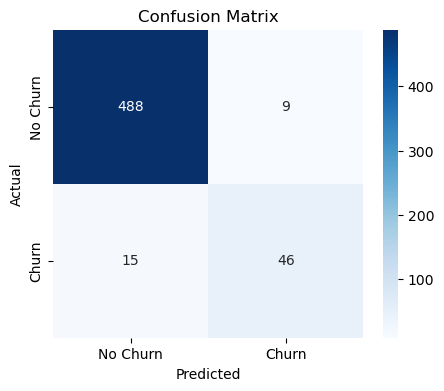

In [103]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

- True Negatives (TN):488 instances were correctly predicted as "Not Churned."

- False Positives (FP): 46 instances were incorrectly predicted as "Churned" when they were actually "Not Churned."

- False Negatives (FN): 15 instances were incorrectly predicted as "Not Churned" when they were actually "Churned."

- True Positives (TP): 9 instances were correctly predicted as "Churned."


### 4.1.3 Random Forest Classifier

In [105]:


# Loading data
X = df.drop(columns=['churn','phone_number']) 
y = df['churn']  # Define target variable

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#  predictions
y_pred = rf_model.predict(X_test)

# model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9480
Precision: 0.9429
Recall: 0.5500
F1-score: 0.6947

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       498
           1       0.94      0.55      0.69        60

    accuracy                           0.95       558
   macro avg       0.95      0.77      0.83       558
weighted avg       0.95      0.95      0.94       558



Accuracy (94.8%)

The model correctly classifies 94.3% of all instances in the dataset.
High accuracy suggests that the model is performing well

Precision (94.29%)
Out of all predicted churners (Class 1), 93.51% were actual churners.
High precision means fewer false positives

Recall (55%)
The model correctly identified 55% of actual churners.
A lower recall suggests the model misses some churners (false negatives).

F1-score (69.47%)
Balances precision and recall.

## 5 Model Evaluation

In [114]:

models = {
    "Logistic Regression": LogisticRegression(random_state=123),
    "Decision Tree": DecisionTreeClassifier(random_state=123, max_depth=5, criterion="gini"),
    "Random Forest": RandomForestClassifier(random_state=123, n_estimators=100, max_depth=5)
}

# Training the models
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    results.append([name, accuracy, precision, recall, f1, auc])

# Results
metrics_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC Score"])

# Print the results
print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1 Score  AUC Score
0  Logistic Regression  0.921147   0.774194  0.393443  0.521739   0.853910
1        Decision Tree  0.956989   0.836364  0.754098  0.793103   0.868852
2        Random Forest  0.930108   0.958333  0.377049  0.541176   0.881651


- Decision Tree is the best balanced model with strong precision, recall, and F1 score.
- Random Forest is best for precision and AUC as it confidently identifies churners but misses many.
- Logistic Regression is solid but has low recall, making it less ideal if catching churners is critical.

Models Comparison - ROC Curve

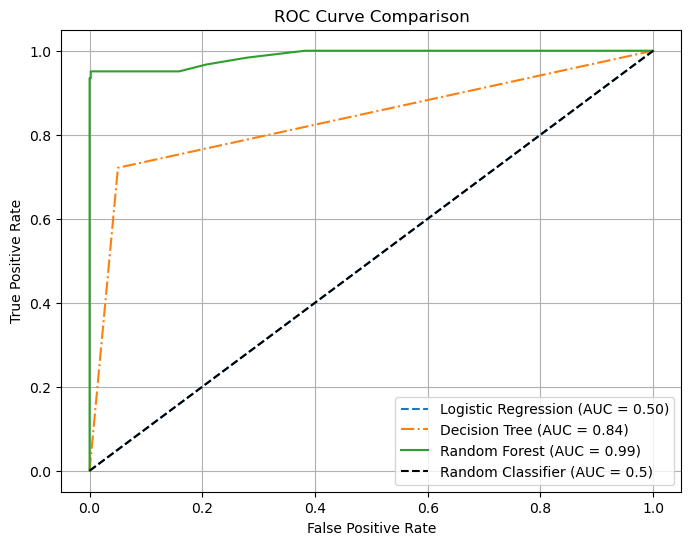

In [120]:

# Logistic Regression
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
auc_logreg = auc(fpr_logreg, tpr_logreg)

# Decision Tree
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = auc(fpr_dt, tpr_dt)

# Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})', linestyle='--')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', linestyle='-.')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linestyle='-')

# Calssifier lie
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.5)")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [121]:
print(f"AUC - Logistic Regression: {auc_logreg:.2f}")
print(f"AUC - Decision Tree: {auc_dt:.2f}")
print(f"AUC - Random Forest: {auc_rf:.2f}")

AUC - Logistic Regression: 0.50
AUC - Decision Tree: 0.84
AUC - Random Forest: 0.99


Logistic Regression (0.50) performs poorly, suggesting poor feature selection.

The Random Forest model (AUC = 0.99) performs strongly and is likely more stable but maybe overfitting.

Meanwhile, Logistic Regression (AUC = 0.50) has the lowest AUC, suggesting it may not be capturing complex relationships in the data effectively. 


## Conclusion

Based on the findings, the business conclusion is as follows:

- Emphasis on Recall: In the realm of predicting customer churn, priority was given to optimizing for Recall. This strategy aimed to minimize the misclassification of churners as non-churners, ensuring that the model effectively identifies customers at risk of leaving.

- Optimal Model: Among the explored models, the Random Forest classifier stood out as the top performer, 

- Key Churn Influencers: Factors such as total day charge, customer service calls, and the number of voice mail messages emerged as significant contributors to customer churn.

- With additional time, there's an opportunity to conduct a thorough exploration of potential features and their influence on the model. This may involve analyzing customer behavior, transaction patterns, or other relevant variables that could contribute valuable information for predicting churn.

- Continuous Improvement: Predicting customer churn is an ongoing endeavor, necessitating constant refinement of the model. Regular monitoring, data collection, and incorporating feedback from stakeholders are crucial for enhancing predictive accuracy and identifying at-risk customers effectively.

## Recommendation

- To address the observed higher churn rates in area codes 415 and 510, it's advised to deploy focused promotional tactics. This entails extending targeted discounts and promotional deals to customers within these regions. By offering incentives like exclusive discounts, the objective is to cultivate customer loyalty and deter churn. This tailored strategy acknowledges the distinct attributes and issues associated with these particular geographical areas.


- In states exhibiting notably elevated churn rates like Texas, New Jersey, Maryland, Miami, and New York, it's recommended to adopt a targeted approach to customer retention. This could include executing personalized marketing efforts, customized promotional deals, and improved customer support programs. Identifying and catering to the unique requirements and preferences of customers in these states is essential for building stronger relationships and mitigating churn.


- An assessment of the current pricing framework for day, evening, night, and international rates is advised. Given the influence of charges on customer churn decisions, it's proposed to examine potential modifications to pricing schemes or the introduction of discounted bundles. This strategic review of pricing aims to rectify any inconsistencies and enhance the competitiveness of the company's offerings, thereby alleviating factors contributing to customer churn.

- The company should ensure continoous prediction of the factors influencing churn by contionously collecting new data and improving the model as prediction is an ongoing process.